In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers.dataset import dataset_experiments, compute_spectrum
%load_ext autoreload
%autoreload 2

In [15]:
common_folder = '/scratch/cimes/cz3321/MOM6/MOM6-examples/ocean_only/double_gyre'
exps = ('R2','R4','R8','R16','R32','R2_GZ','R4_GZ','R8_GZ','R16_GZ')

In [16]:
ds = dataset_experiments(common_folder, exps)

# Double Gyre. Model domain and layer interfaces
- Model domain - "bowl" with one vertical wall
- There are two fluid layers. Interface between them is shown in orange.
- Mean "ciruclation" (given by SSH) is shown by contours.
- Turbulence is forced by wind (in blue lines)

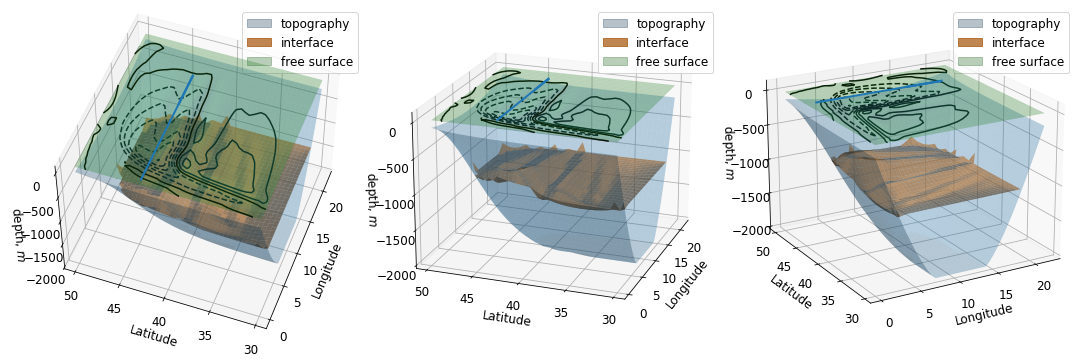

In [11]:
ds.plot_domain('R2_BUILDER')

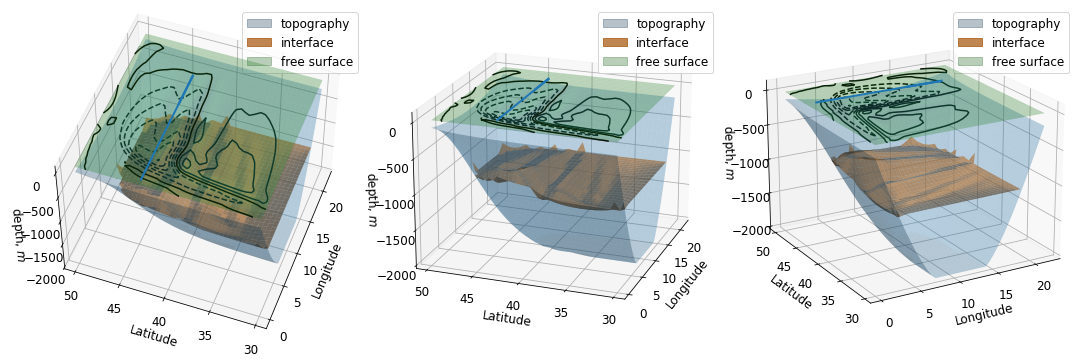

In [ ]:
ds.plot_domain('R2')

# Relative vorticity in units of local Coriolis parameter

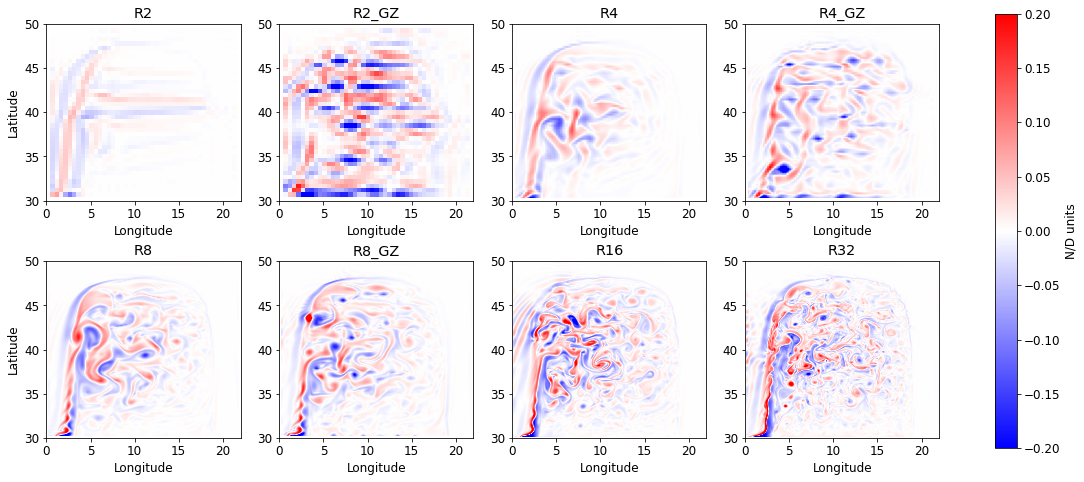

In [42]:
ds.plot_relative_vorticity_snapshot(('R2','R2_GZ','R4','R4_GZ','R8','R8_GZ','R16','R32'))

# Kinetic energy snapshot

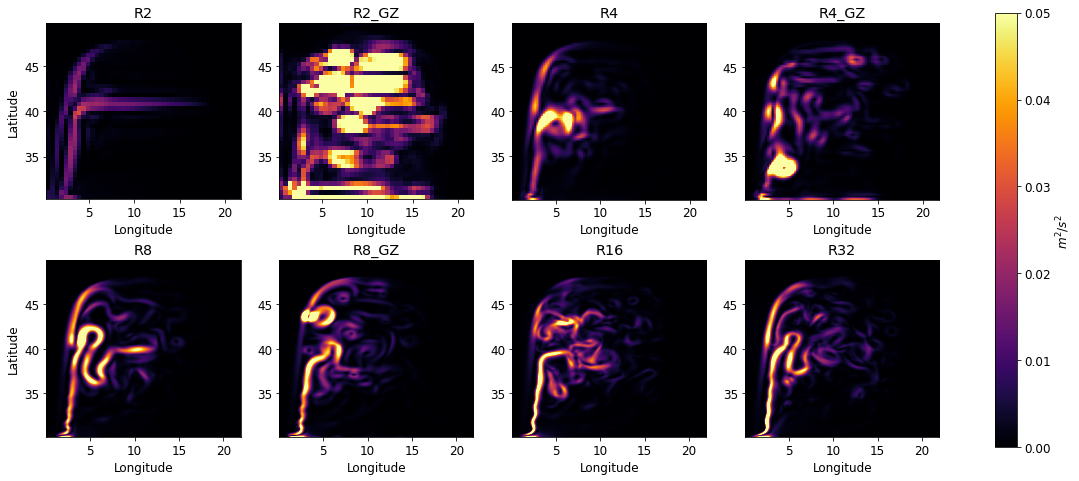

In [43]:
ds.plot_KE_snapshot(('R2','R2_GZ','R4','R4_GZ','R8','R8_GZ','R16','R32'))

# Eddy kinetic energy averaged over 10 years, upper layer

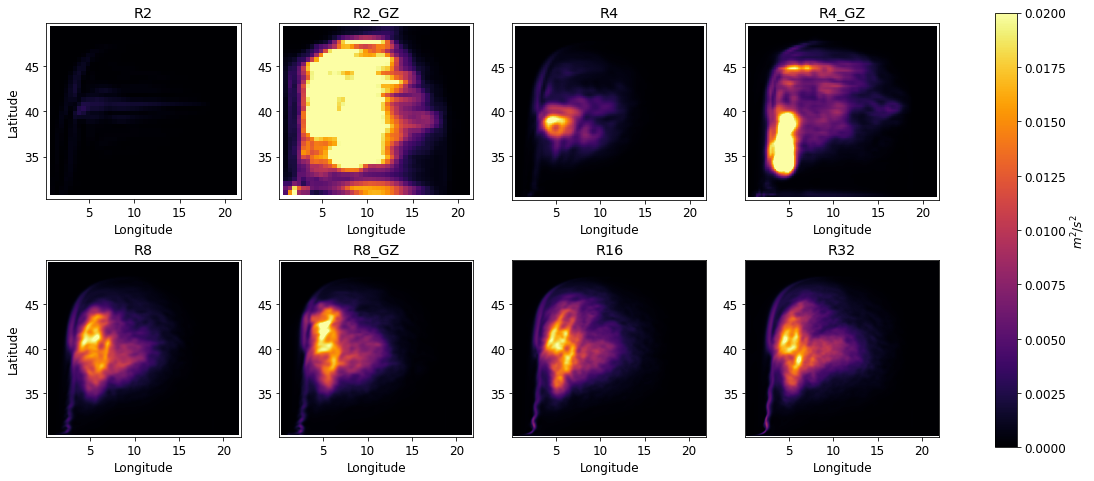

In [51]:
ds.plot_EKE(('R2','R2_GZ','R4','R4_GZ','R8','R8_GZ','R16','R32'))

# EKE, lower layer

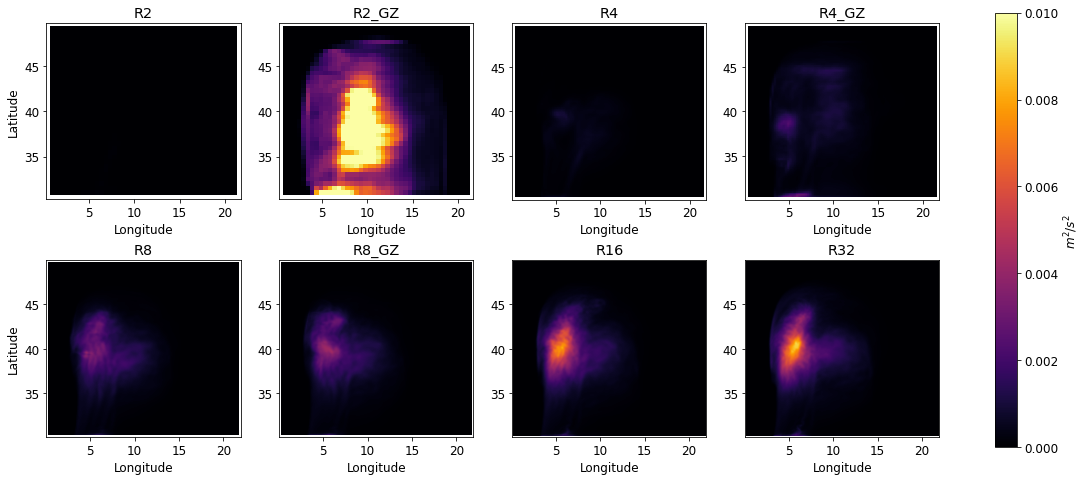

In [52]:
ds.plot_EKE(('R2','R2_GZ','R4','R4_GZ','R8','R8_GZ','R16','R32'), zl=1, vmax=0.01)

# Kinetic energy spectra

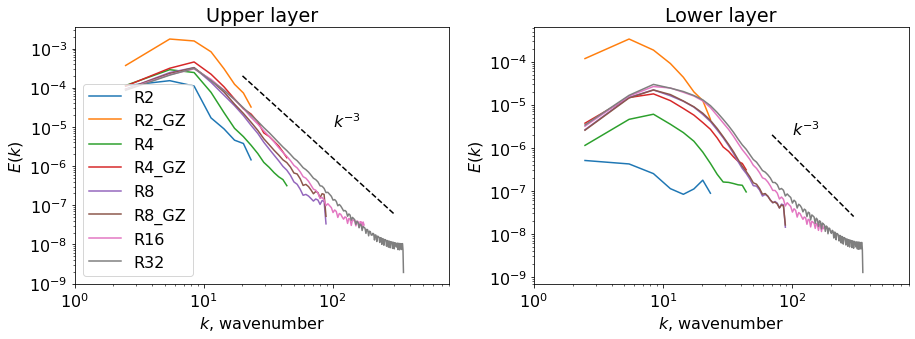

In [44]:
ds.plot_KE_spectrum(('R2','R2_GZ','R4','R4_GZ','R8','R8_GZ','R16','R32'), tstart=0., nfactor=2)

# Energy cospectrum of biharmonic Smagorinsky

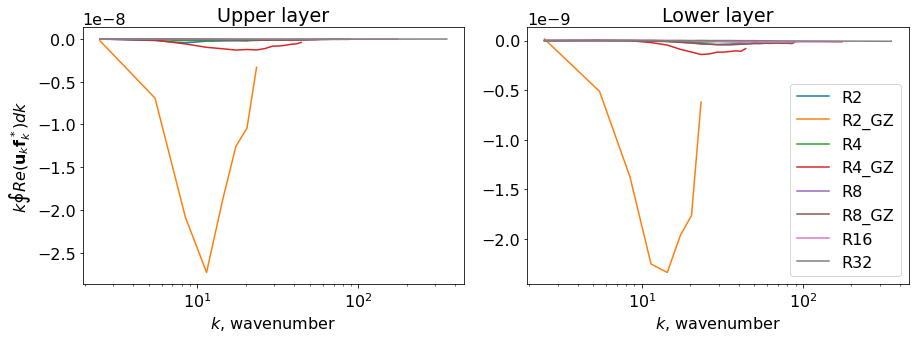

In [45]:
ds.plot_cospectrum(('R2','R2_GZ','R4','R4_GZ','R8','R8_GZ','R16','R32'), tstart = 0., nfactor=2, averaging=False)

# Analysis of mean flow: 10-years mean Sea Surface Height

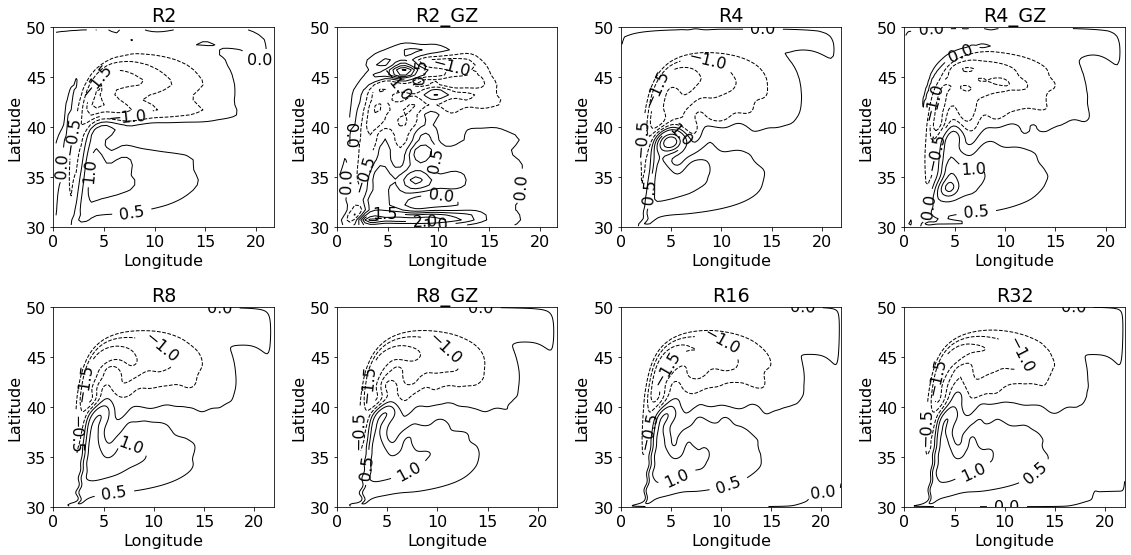

In [46]:
ds.plot_ssh(('R2','R2_GZ','R4','R4_GZ','R8','R8_GZ','R16','R32'))

# Analysis of Kinetic Energy

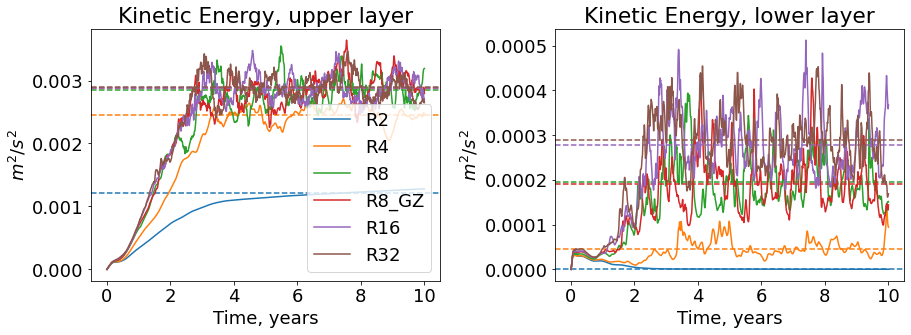

In [49]:
ds.plot_KE(('R2','R4','R8','R8_GZ','R16','R32'))

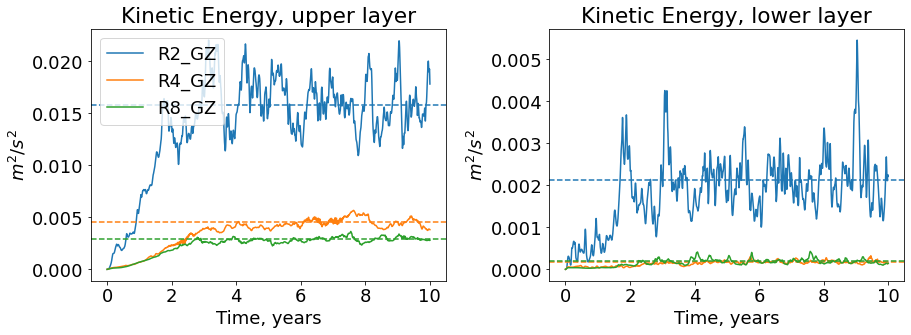

In [50]:
ds.plot_KE(('R2_GZ','R4_GZ','R8_GZ'))

# Wall clock time for MOM6 and CNN models: 44x40

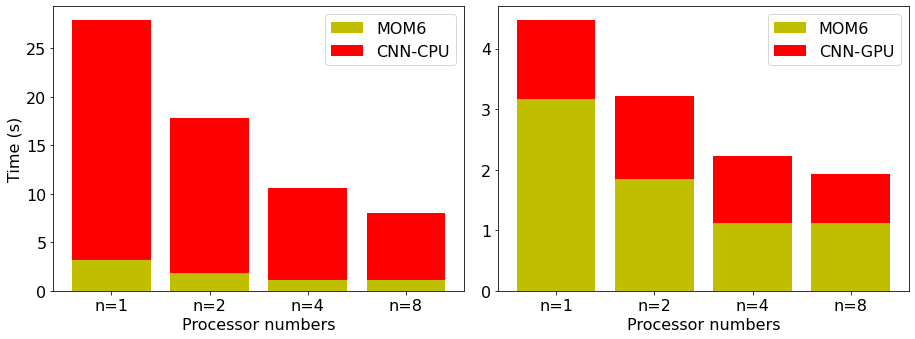

In [21]:
CPU = [27.915291,17.788692,10.620762,8.021421]
GPU = [4.472861,3.209388,2.233687,1.926357]
MOM6 = [3.172446,1.848026,1.113870,0.774688]
NODES = ['n=1','n=2','n=4','n=8']
ds.plot_wall_clock(MOM6, CPU, GPU, NODES)

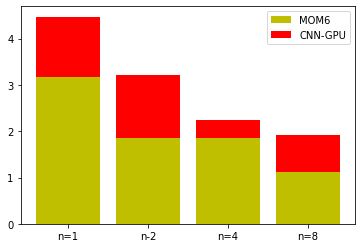

In [9]:
name_list = ['n=1','n-2','n=4','n=8']
MOM6 = [3.172446,1.848026,1.113870,1.113870]
MOM6 = np.array(MOM6)
CNN = [4.472861,3.209388,2.233687,1.926357]
CNN = np.array(CNN)
CNN = CNN-MOM6
MOM6.tolist();CNN.tolist()
plt.bar(range(len(MOM6)),MOM6,label='MOM6',fc='y')
plt.bar(range(len(MOM6)),CNN,bottom=MOM6,label='CNN-GPU',tick_label = name_list,fc='r')
plt.legend()
plt.show()

# Wall clock time for MOM6 and CNN models: 88x80

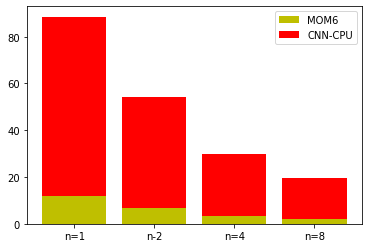

In [7]:
name_list = ['n=1','n-2','n=4','n=8']
MOM6 = [12.091419,6.706431,3.529762,2.120441]
MOM6 = np.array(MOM6)
CNN = [88.544241,54.277907,29.892054,19.513104]
CNN = np.array(CNN)
CNN = CNN-MOM6
MOM6.tolist();CNN.tolist()
plt.bar(range(len(MOM6)),MOM6,label='MOM6',fc='y')
plt.bar(range(len(MOM6)),CNN,bottom=MOM6,label='CNN-CPU',tick_label = name_list,fc='r')
plt.legend()
plt.show()

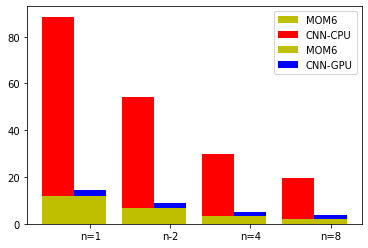

In [17]:
name_list = ['n=1','n-2','n=4','n=8']
MOM6 = [12.091419,6.706431,3.529762,2.120441]
MOM6 = np.array(MOM6)
CNN = [14.591500,8.813841,5.101607,3.801065]
CNN = np.array(CNN)
CNN = CNN-MOM6
MOM6.tolist();CNN.tolist()
plt.bar(range(len(MOM6)),MOM6,label='MOM6',fc='y')
plt.bar(range(len(MOM6)),CNN,bottom=MOM6,label='CNN-GPU',tick_label = name_list,fc='r')
plt.legend()
plt.show()

In [ ]:
name_list = ['n=1','n-2','n=4','n=8']
MOM6 = [12.091419,6.706431,3.529762,2.120441]
MOM6 = np.array(MOM6)
CNN_CPU = [88.544241,54.277907,29.892054,19.513104]
CNN_CPU = np.array(CNN_CPU)
CNN_CPU = CNN_CPU-MOM6
CNN_GPU = [14.591500,8.813841,5.101607,3.801065]
CNN_GPU = np.array(CNN_GPU)
CNN_GPU = CNN_GPU-MOM6
MOM6.tolist();CNN_CPU.tolist();CNN_GPU.tolist()
total_width,n = 0.8,2
width = total_width/n
x = list(range(len(MOM6)))
plt.bar(x,MOM6,width=width,label='MOM6',fc='y')
plt.bar(x,CNN_CPU,width=width,bottom=MOM6,label='CNN-CPU',tick_label = name_list,fc='r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x,MOM6,width=width,label='MOM6',fc='y')
plt.bar(x,CNN_GPU,width=width,bottom=MOM6,label='CNN-GPU',tick_label = name_list,fc='b')
plt.legend()
plt.show()